**Adaptive Boosting (AdaBoost) for classification with Python**

**Objectives**
Understand that AdaBoost is a linear combination of 𝑇 weak classifiers


**Understand Hyperparameters selection in AdaBoost**
Like Bagging and Random Forest (RF), AdaBoost combines the outputs of many classifiers into an ensemble, but there are some differences. Each classifier in the ensemble is powerful but prone to overfitting. As Bagging or RF aggregate more and more classifiers, they reduce overfitting.

With AdaBoost, each Classifier usually has performance slightly better than random. This is referred to as a weak learner or weak classifier. AdaBoost combines these classifiers to get a strong classifier. Unlike Bagging and Random Forest, in AdaBoost, adding more learners can cause overfitting. As a result, AdaBoost requires Hyperparameter tuning, taking more time to train. One advantage of AdaBoost is that each classifier is smaller, so predictions are faster.

In AdaBoost, the strong classifier 𝐻(𝑥) is a linear combination of 𝑇 weak classifiers ℎ𝑡(𝑥) and 𝛼𝑡
 as shown in (1). Although each classifier ℎ𝑡(𝑥) appears independent, the 𝛼𝑡 contains information about the error of classifiers from ℎ1(𝑥),..,ℎ𝑡−1(𝑥)
 
. As we add more classifiers, the training accuracy gets larger. What’s not so apparent in (1) is that during the training process, the values of that training sample are modified for ℎ𝑡(𝑥)

𝐻(𝑥)=𝑒𝑥𝑡𝑠𝑖𝑔𝑛(∑𝑇𝑡=1𝛼𝑡ℎ𝑡(𝑥))  [1]

Table of contents
What's the difference between RF and Bagging
Cancer Data Example
Practice


**tqdm is a Python library that provides a fast, extensible progress bar for loops and other iterable computations.**
The name "tqdm" stands for "taqaddum" in Arabic, which means "progress." It is designed to give users a visual indication of the progress of an operation by displaying a progress bar in the console.

Here's a simple example of how tqdm can be used in a loop:

In [5]:
from tqdm import tqdm
import time

# Using tqdm with a loop
for i in tqdm(range(10)):
    # Some computation or task
    time.sleep(0.5) # this value set sleep time after every interval


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.97it/s]


In [28]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm


In [41]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

**Learning Rate**
- In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. Since it influences to what extent newly acquired information overrides old information, it metaphorically represents the speed at which a machine learning model "learns". In the adaptive control literature, the learning rate is commonly referred to as gain
-  It is multiplied by the gradient of the loss function with respect to the model parameters and is used to update the parameters in the direction that reduces the loss.
**Too Small Learning Rate:**
If the learning rate is too small, the optimization algorithm may converge very slowly. The model parameters are updated in tiny steps, and it might take a long time for the algorithm to reach the minimum of the loss function.
**Too Large Learning Rate:**
On the other hand, if the learning rate is too large, the optimization algorithm might overshoot the minimum of the loss function. This can lead to oscillations or divergence, and the model may fail to converge.
**Optimal Learning Rate:**
The optimal learning rate often depends on the specific dataset and the characteristics of the optimization problem. Techniques such as grid search or more advanced optimization algorithms like adaptive learning rate methods (e.g., AdaGrad, RMSprop, and Adam) are used to find a suitable learning rate during training.
**Learning Rate Schedules:**
In practice, learning rates are often adjusted during training. Learning rate schedules, where the learning rate decreases over time, are commonly employed to fine-tune the optimization process.

This function calculates the average accuracy of differnt learning rates on training and test data and will show line charts for the different learning rates

In [36]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1]):

    lines_array=['solid','--', '-.', ':']  # line types of charts

    N_estimators=[n for n in range(1,100)]   
    
    times=20
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))  # defining test_acc
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = AdaBoostClassifier(n_estimators=n_estimators+1,random_state=0,learning_rate=lr)
                model.fit(X_train,y_train)
               

                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)

                train_acc[n,j,n_estimators-1]=Accuracy['train Accuracy']
                test_acc[n,j,n_estimators-1]=Accuracy['test Accuracy']


    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.set_xlabel('No of estimators')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    plt.show()

### About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically, it is less expensive to keep customers than to acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TChurnData.csvV and movies
*   Customer account information – how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


In [9]:
churn_df = pd.read_csv('ChurnData.csv')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

- Let's select some features for the modeling. 
- Also, we change the target data type to be an integer to define classes mathmatically

In [104]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


**Select Variables at Random**
Like Bagging, RF uses an independent bootstrap sample from the training data. In addition, we select  𝑚 variables at random out of all  𝑀 possible variables. Let's do an example of selecting 7 features.

Select Variables at Random
Like Bagging, RF uses an independent bootstrap sample from the training data. In addition, we select  𝑚  variables at random out of all  𝑀  possible variables. 
        Let's do an example of selecting 7 variables

In [11]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

In [12]:
y = churn_df['churn']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



The parameter <code>n_estimatorsint</code> is the maximum number of classifiers (default=50) at which boosting is stopped. If the results are perfect, the training procedure is stopped early.

In [14]:
n_estimators=5
random_state=0

AdaBoost is usually performed with Decision Trees classifier as the base estimator or base classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
n_estimators=5
random_state=0
# Creating an AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
#base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)
# Fitting the model
model.fit(X_train, y_train)

D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=5, random_state=0)

If the outputs were y-1 and 1, the form of the classifier would be:
𝐻(𝑥)=𝑒𝑥𝑡𝑠𝑖𝑔𝑛(𝛼1ℎ1(𝑥)+𝛼2ℎ2(𝑥)+𝛼3ℎ3(𝑥)+𝛼4ℎ4(𝑥)+𝛼5ℎ5(𝑥))  (i.e. n_estimators=5)

We can fit the object finding all the  𝛼𝑡ℎ𝑡(𝑥) and then make a prediction:

In [18]:
y_pred = model.predict(X_test)
y_pred 

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0.])

In [19]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.7642857142857142}


We can output a list of the weak classifiers: ℎ1(𝑥),ℎ2(𝑥),ℎ3(𝑥),ℎ4(𝑥) and  ℎ5(𝑥)

In [22]:
model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=209652396),
 DecisionTreeClassifier(max_depth=1, random_state=398764591),
 DecisionTreeClassifier(max_depth=1, random_state=924231285),
 DecisionTreeClassifier(max_depth=1, random_state=1478610112),
 DecisionTreeClassifier(max_depth=1, random_state=441365315)]

We see the base model is a Decision Tree. Since it only has one layer i.e max_depth=1, it’s called a stump
In AdaBoost (Adaptive Boosting), a "stump" refers to a weak learner or a weak classifier that is used as the base learner in the ensemble. The term "stump" is often used to describe a simple and shallow decision tree with only one level, also known as a "decision stump.

In [23]:
#OR Printing information about each base estimator while looping through all the estimators
for i, estimator in enumerate(base_estimators):
    print(f"Base Estimator {i + 1}:\n{estimator}\n")

Base Estimator 1:
DecisionTreeClassifier(max_depth=1, random_state=209652396)

Base Estimator 2:
DecisionTreeClassifier(max_depth=1, random_state=398764591)

Base Estimator 3:
DecisionTreeClassifier(max_depth=1, random_state=924231285)

Base Estimator 4:
DecisionTreeClassifier(max_depth=1, random_state=1478610112)

Base Estimator 5:
DecisionTreeClassifier(max_depth=1, random_state=441365315)



Lets define the classifier as weak classifiers and check the accuracies of training and test sets in the weak classifiers.We see the weak classifiers do not perform as well in terms of accuracy

In [24]:
[ ("for weak classifiers {} the we get ".format(i+1),get_accuracy(X_train, X_test, y_train, y_test,  weak_classifiers)) for i,weak_classifiers in enumerate(model.estimators_)]

D:\Computer\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Computer\lib\site-package

[('for weak classifiers 1 the we get ',
  {'test Accuracy': 0.7, 'train Accuracy': 0.7428571428571429}),
 ('for weak classifiers 2 the we get ',
  {'test Accuracy': 0.6, 'train Accuracy': 0.6214285714285714}),
 ('for weak classifiers 3 the we get ',
  {'test Accuracy': 0.6333333333333333, 'train Accuracy': 0.6642857142857143}),
 ('for weak classifiers 4 the we get ',
  {'test Accuracy': 0.35, 'train Accuracy': 0.4642857142857143}),
 ('for weak classifiers 5 the we get ',
  {'test Accuracy': 0.43333333333333335, 'train Accuracy': 0.5})]

We can increase the number of weak classifiers to fit the model

In [27]:
n_estimators=100
random_state=0

In [28]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


We see that adding more weak classifiers causes overfitting. We can verify by plotting the training and test accuracy over the number of classifiers keeping learning_rate_=[1]

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME 

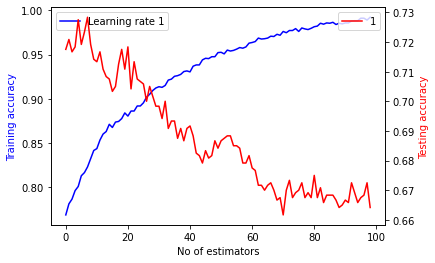

In [30]:
get_accuracy_bag(X,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[1],times=20,xlabel='Number Estimators')


The graph shows that the accuracy of test set is 73% and training set is 100% i.e overfitted. We can also print the accuracy through get_accuracy as under:

In [29]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7333333333333333, 'train Accuracy': 1.0}


As the number of classifiers increases so does the overfitting; the training accuracy increases and conversely, the testing accuracy decreases. 
One way to decrease overfitting is using the learning rate of different values. Default learning_rate is 1. This is a type of Regularization. 

In [31]:
n_estimators=100
random_state=0
learning_rate=0.7

In [32]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state,learning_rate=learning_rate)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'test Accuracy': 0.75, 'train Accuracy': 0.95}


Compared to the previous results we see the model does better on the test data. We can try different learning rates using the method get_accuracy_bag. In this case, the learning rates are 0.2,0.4,0.6, and 1. As the learning rate goes down we see that the testing accuracy increases while conversely, the training accuracy decreases .

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME 

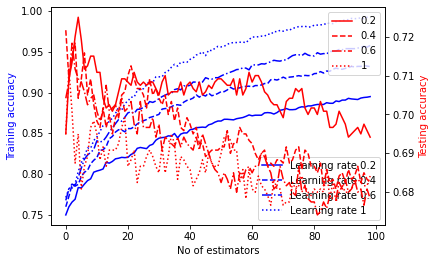

In [33]:
get_accuracy_bag(X,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[0.2,0.4,0.6,1],times=20,xlabel='Number Estimators')

In [34]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.75, 'train Accuracy': 0.95}


The graph shows trianing and test line charts at different learning rates. 

Another important parameter is algorithm with takes on the values SAMME, SAMME.R. The default is ’SAMME.R’. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. For more details, check the paper. One issue is that SAMME.R can't be used all the time as we will need the Base classifier to generate the probability of belonging to each class.

**Changing the Base Classifier**
AdaBoost is usually performed with Decision Trees but we can use other base classifiers. However, if the classifier is too strong it will cause overfitting. Consider using the following Support Vector Machine (SVM) as the base classifier:

In [49]:
from sklearn.svm import SVC

In [50]:
base_estimator=SVC(kernel='rbf',gamma=1)

In [51]:
base_estimator.fit(X_train, y_train)

print(get_accuracy(X_train, X_test, y_train, y_test, base_estimator))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 1.0}


The Base classifier for SVM can not generate the probability of belonging to each class. If you uncomment the following line of code you will get an error. 
Therefore the parameter algorithm must be 'SAMME'

In [52]:
#base_estimator.predict_proba(X_train)
#base_estimator.predict_prob

In [53]:
algorithm='SAMME'

In [66]:
# Create an SVM base estimator
base_estimator = SVC(kernel='rbf', gamma=1, probability=True)

# Create AdaBoostClassifier using SAMME algorithm with the SVM base estimator
model = AdaBoostClassifier(base_estimator, n_estimators=5, learning_rate=1, algorithm='SAMME')
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=SVC(gamma=1, probability=True),
                   learning_rate=1, n_estimators=5)

We see the AdaBoost model does worse, this is similar to overfitting. In addition, SVM takes much longer to train than classification trees:


In [67]:
#Predict the response for test dataset
y_pred = model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.465, 'train Accuracy': 0.50875}


<h2 id="Example">Cancer Data Example</h2>

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[[http://mlearn.ics.uci.edu/MLRepository.html](http://mlearn.ics.uci.edu/MLRepository.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01)]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

Let's load the dataset:


In [69]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Now lets remove rows that have a ? in the BareNuc column

In [71]:
# Check for '?' in any column
question_marks_in_columns = df.apply(lambda col: col[col == '?'].count())
print(f"Occurrences of '?' in each column:\n{question_marks_in_columns}")

# Check for '?' in any row
question_marks_in_rows = df.apply(lambda row: (row == '?').sum(), axis=1)
print(f"Occurrences of '?' in each row:\n{question_marks_in_rows}")


Occurrences of '?' in each column:
ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64
Occurrences of '?' in each row:
0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    0
697    0
698    0
Length: 699, dtype: int64


The above result shows that '?' exist in BareNuc

In [72]:
# Find row numbers where '?' occurs in any column
rows_with_question_marks = df[df.apply(lambda row: any(row == '?'), axis=1)]
print("Rows with '?' in any column:")
print(rows_with_question_marks)


Rows with '?' in any column:
          ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
23   1057013      8         4          5        1            2       ?   
40   1096800      6         6          6        9            6       ?   
139  1183246      1         1          1        1            1       ?   
145  1184840      1         1          3        1            2       ?   
158  1193683      1         1          2        1            3       ?   
164  1197510      5         1          1        1            2       ?   
235  1241232      3         1          4        1            2       ?   
249   169356      3         1          1        1            2       ?   
275   432809      3         1          3        1            2       ?   
292   563649      8         8          8        1            2       ?   
294   606140      1         1          1        1            2       ?   
297    61634      5         4          3        1            2       ?   
315   704

Lets remove the ? row

In [74]:
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [75]:
# lets check again any row numbers where '?' occurs in any column
rows_with_question_marks = df[df.apply(lambda row: any(row == '?'), axis=1)]
print("Rows with '?' in any column:")
print(rows_with_question_marks)

Rows with '?' in any column:
Empty DataFrame
Columns: [ID, Clump, UnifSize, UnifShape, MargAdh, SingEpiSize, BareNuc, BlandChrom, NormNucl, Mit, Class]
Index: []


In [76]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [77]:
y=df['Class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
model = AdaBoostClassifier()
model.get_params().keys()

dict_keys(['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [81]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}                
param_grid 

{'learning_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'algorithm': ['SAMME', 'SAMME.R']}

In [82]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [83]:
search.best_score_

0.9689074228523771

In [84]:
search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 17}

In [85]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9725274725274725}


**Medincine Data**
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [45]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [46]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [47]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [48]:
#Now lets use a <code>LabelEncoder</code> to turn categorical features into numerical:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])  # applied on column 1 of sex

le_BP = preprocessing.LabelEncoder() # applied on column 2 of BP
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder() # applied on column 3 of Cholestrol
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]  # see the transformed data X after label encoding

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [50]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}                

param_grid

{'learning_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'algorithm': ['SAMME', 'SAMME.R']}

Create a AdaBoostClassifier object called model 

In [51]:
model = AdaBoostClassifier()

Create GridSearchCV object called search with the estimator set to model, param_grid set to param_grid, scoring set to accuracy, and cv set to 3 and Fit the GridSearchCV object to our X_train and y_train data.

In [29]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy', cv=3)
search.fit(X_train, y_train)

D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Computer\lib\site-packages\sklearn\ensemble\_weight_boosting.

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [55]:
search.best_score_

0.8625669694852084

In [31]:
search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 7}

In [54]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.775, 'train Accuracy': 0.85}
